In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Loading the Dataset

In [ ]:
# Load the dataset
dataset_path = "/content/drive/MyDrive/Work/Projects/All the Intermediate Colleges in Pakistan.csv"
data = pd.read_csv(dataset_path)

In [ ]:
# Display the first few rows of the dataset
print(data.head())

                                                Name  \
0                                   Campus.pk Lahore   
1        Allama Iqbal Open University Aiou Islamabad   
2           Government College University Gcu Lahore   
3             Govt College University GCU Faisalabad   
4  Lahore College For Women University (Lcwu) Lahore   

                                            Location  \
0  Office 206, 2nd Floor Siddique Trade Center Ma...   
1                        Sector H-8, Islamabad-44000   
2          GC University, Katchery Road Lahore 54000   
3                       Kotwali Rd, Faisalabad 38000   
4                Near Wapda Flats, Jail Road, Lahore   

                                       Study Program   Sector Affiliation  \
0                FSc Pre Engineering Fsc Pre Medical  Private         ads   
1  FSc Pre Engineering ICs Computer Science FSc P...   Public         NaN   
2  FSc Pre Engineering ICS Computer Science FSc P...   Public         HEC   
3  FSc Pre-Enginee

In [ ]:
print(data.shape)

(1630, 6)


In [ ]:
# Summary statistics
print(data.describe())

                    Name Location  \
count               1630     1626   
unique              1630     1573   
top     Campus.pk Lahore  Chakwal   
freq                   1       11   

                                            Study Program   Sector  \
count                                                1630     1101   
unique                                                774        2   
top     FA ICS Computer Science FSc Pre Medical FSc Pr...  Private   
freq                                                   49      562   

                   Affiliation Rating  
count                      155   1630  
unique                      97     21  
top     University of Sargodha     0*  
freq                         7   1119  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB
None


In [ ]:
pd.isnull(data)

,Name,Location,Study Program,Sector,Affiliation,Rating
0,False,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
1625,False,False,False,False,True,False
1626,False,False,False,False,True,False
1627,False,False,False,False,True,False
1628,False,False,False,False,True,False


# Check for missing values




In [ ]:
# Check for missing values
print(data.isnull().sum())

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64


In [ ]:
data.dropna(inplace=True)

In [ ]:
print(data.isnull().sum())

Name             0
Location         0
Study Program    0
Sector           0
Affiliation      0
Rating           0
dtype: int64


# Data cleaning: Remove asterisks and convert ratings to float


In [ ]:
print(data.columns)

Index(['Name', 'Location', 'Study Program', 'Sector', 'Affiliation', 'Rating'], dtype='object')


In [ ]:
data['Rating'] = data['Rating'].str.replace('*','').astype(float)

In [ ]:
data["Rating"] = data["Rating"].round().astype(int)
data["Rating"].unique()

array([0, 4, 3, 2, 1, 5])

In [ ]:
data["Sector"].unique()

array(['Private', 'Public'], dtype=object)

In [ ]:
print(data)

                                                   Name  \
0                                      Campus.pk Lahore   
2              Government College University Gcu Lahore   
3                Govt College University GCU Faisalabad   
12                  Punjab Group of Colleges PGC Lahore   
19           Govt College of Science Wahdat Road Lahore   
...                                                 ...   
1455                  Little Oxford College of Commerce   
1476                   Stars Group of Colleges Shahdara   
1523   Govt Inter College Boys Bahtar Fateh Jang Attock   
1560  Govt Inter College Narrah Kanjoor Chhab Jand A...   
1588        Govt Institute Of Commerce Pindigheb Attock   

                                               Location  \
0     Office 206, 2nd Floor Siddique Trade Center Ma...   
2             GC University, Katchery Road Lahore 54000   
3                          Kotwali Rd, Faisalabad 38000   
12    1 Noon Avenue, New Muslim Town at Canal Bank L...

In [ ]:
data['Rating'].dtypes

dtype('float64')

In [ ]:
data.describe()

,Rating
count,75.000000
mean,1.516667
std,2.022397
min,0.000000
25%,0.000000
50%,0.000000
75%,3.625000
max,5.000000


In [ ]:
data['City'] = data['Name'].apply(lambda x: x.split()[-1])

# Displaying the updated dataframe
data.head()

,Name,Location,Study Program,Sector,Affiliation,Rating,City
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...","[['[\'[""[\\\'nan\\\']""]\']']]",Private,ads,0,Lahore
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000","[['[\'[""[\\\'nan\\\']""]\']']]",Public,HEC,4,Lahore
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000","[['[\'[""[\\\'nan\\\']""]\']']]",Public,HEC,3,Faisalabad
12,Punjab Group of Colleges PGC Lahore,"1 Noon Avenue, New Muslim Town at Canal Bank L...","[['[\'[""[\\\'nan\\\']""]\']']]",Private,University of the Punjab Lahore \n BISE Lahore,2,Lahore
19,Govt College of Science Wahdat Road Lahore,"Govt. College of Science, Wahdat Road Lahore,","[['[\'[""[\\\'nan\\\']""]\']']]",Public,Board of Intermediate Secondary Education Laho...,3,Lahore



# Exploratory Data Analysis (EDA)

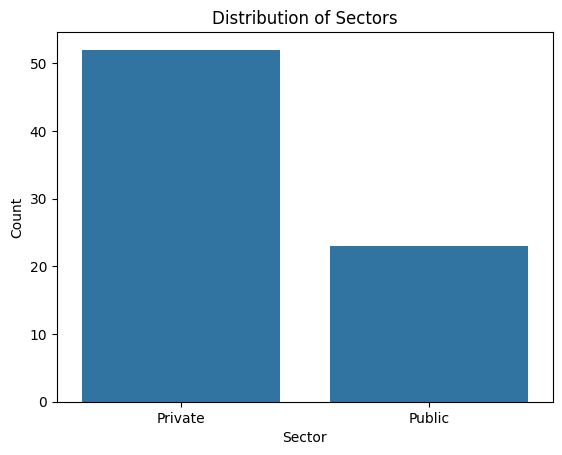

In [ ]:
x=sns.countplot(x='Sector', data=data)
plt.title('Distribution of Sectors')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

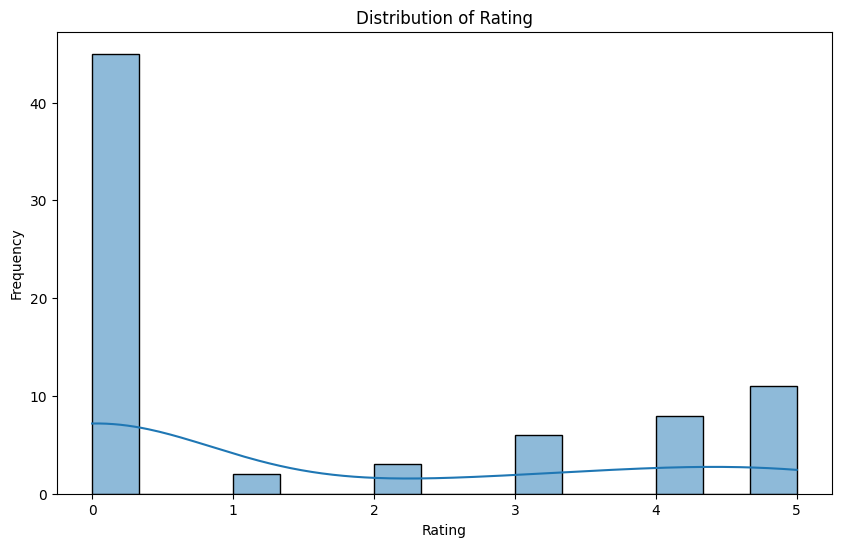

In [ ]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=15, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

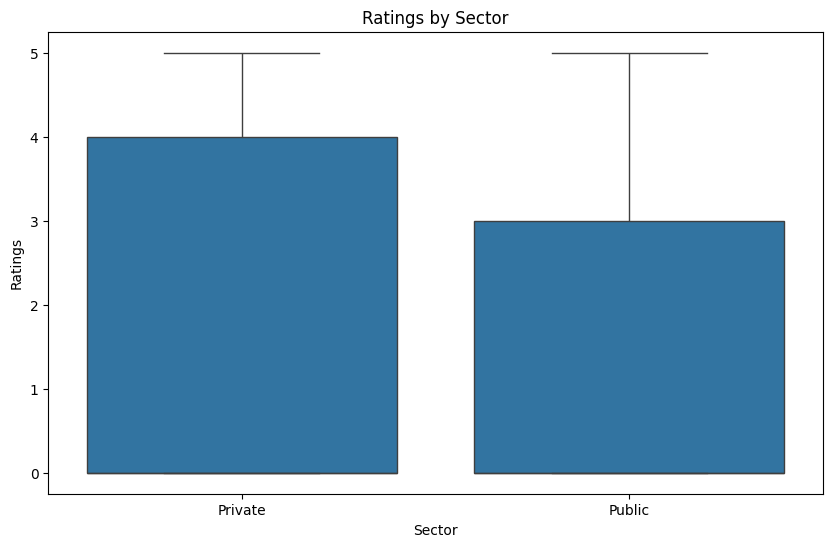

In [ ]:
# Ratings by sector
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='Rating', data=data)
plt.title('Ratings by Sector')
plt.xlabel('Sector')
plt.ylabel('Ratings')
plt.show()

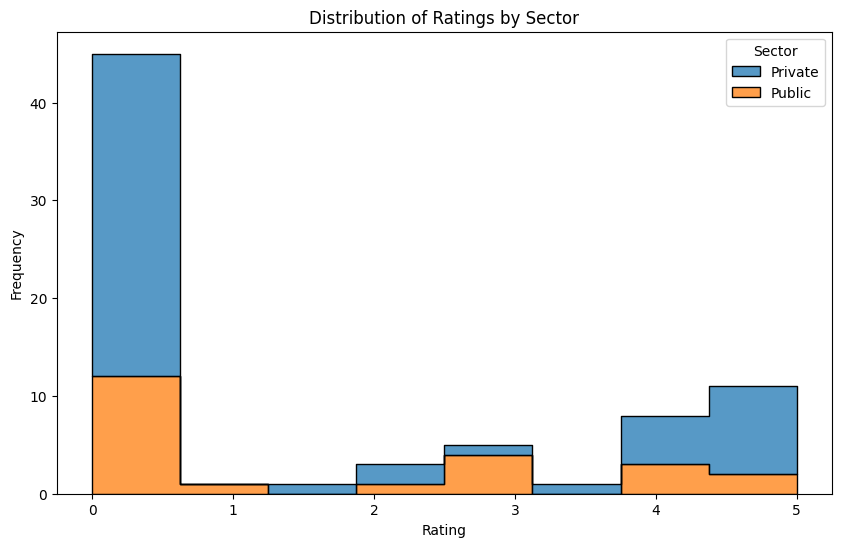

In [ ]:
## 4. Distribution of Ratings by Sector
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Rating', hue='Sector', element='step', multiple='stack')
plt.title('Distribution of Ratings by Sector')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

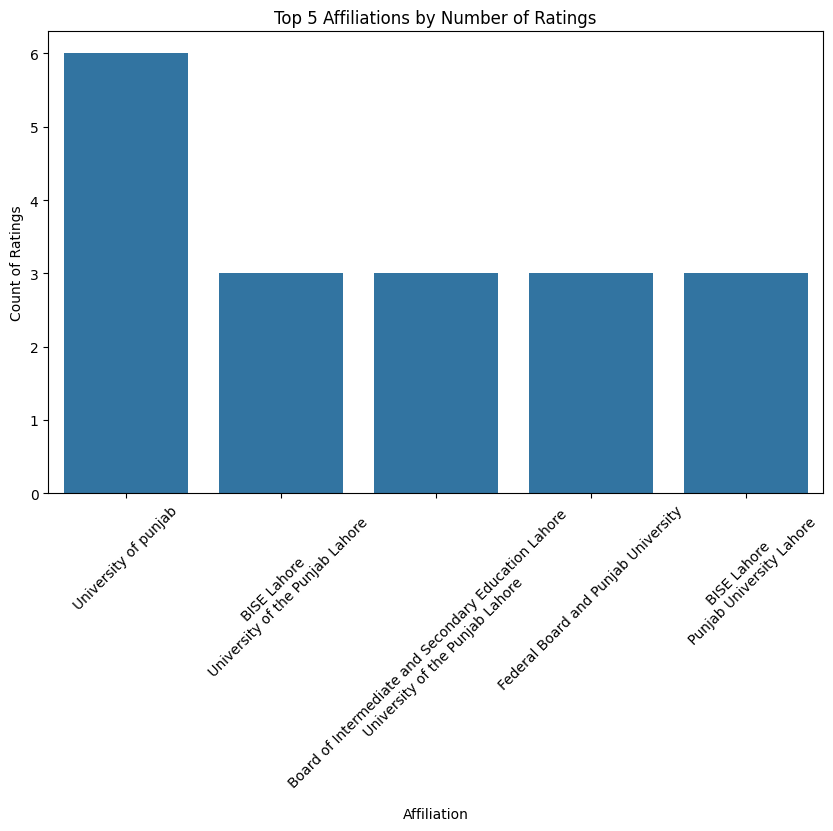

In [ ]:
top_affiliations = data['Affiliation'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_affiliations.index, y=top_affiliations.values)
plt.xticks(rotation=45)
plt.title('Top 5 Affiliations by Number of Ratings')
plt.xlabel('Affiliation')
plt.ylabel('Count of Ratings')
plt.show()

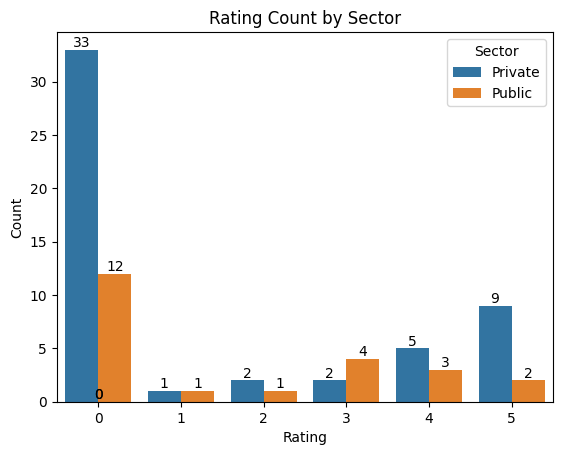

In [ ]:
ax = sns.countplot(x="Rating", data=data, hue="Sector")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Adjusting plot aesthetics
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Count by Sector")

# Displaying the plot
plt.show()

In [ ]:
px.scatter(data['City'].value_counts(), color=data['City'].value_counts().index)

In [ ]:
plt.figure(figsize=(10, 6))
city_counts = data["City"].value_counts().head(15)
fig = px.bar(x=city_counts.index, y=city_counts.values, color=city_counts.index)
fig.show()

<Figure size 1000x600 with 0 Axes>